In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



dataset=pd.read_csv("C:/Users/ASUS/Downloads/diabetes.csv")

print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [113]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [114]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [115]:
x= dataset.iloc[:, :-1]
y= dataset.iloc[:, -1]

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [117]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [118]:
dt.score(x_train, y_train)

1.0

In [119]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       146
           1       0.65      0.65      0.65        85

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [120]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)

In [121]:
clf.score(x_train, y_train)

0.7635009310986964

In [122]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



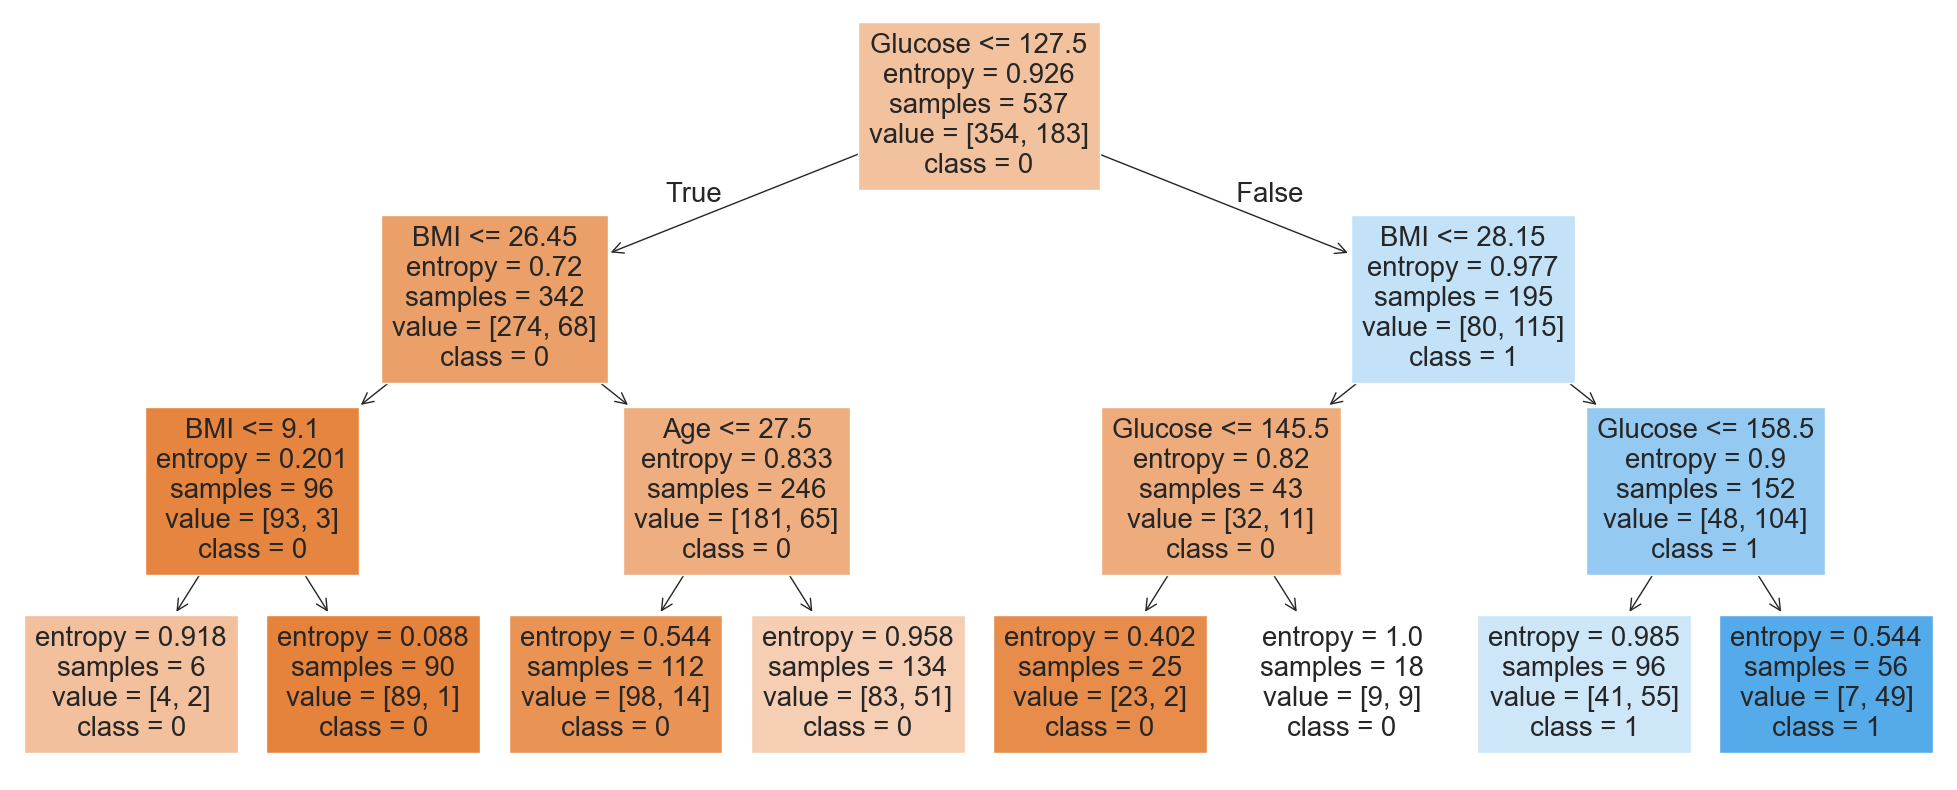

In [123]:
from sklearn import tree
plt.figure(figsize=(25,10))
_=tree.plot_tree(clf, feature_names=x.columns, class_names=['0','1'], filled=True)

In [124]:
from sklearn.model_selection import cross_val_score
clf_cv = DecisionTreeClassifier(criterion='entropy', max_depth=3)
cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
print(cv_scores)

[0.68518519 0.76851852 0.71962617 0.73831776 0.71962617]


In [125]:
np.mean(cv_scores)

0.7262547594323294

In [126]:
from sklearn.model_selection import GridSearchCV
pgrid = {
    'max_depth': [1,2, 3, 4, 5, 6,7,8,9,10],
    'min_samples_split': [2,3,5,10,15,20],
    }



In [127]:
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=pgrid, cv=5)

In [128]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 5, 10, 15, 20]})

In [129]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 15}

In [130]:
grid_search.best_estimator_.score(x_test, y_test)

0.7922077922077922

In [131]:
dt2= DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=15)
dt2= dt2.fit(x_train, y_train)
y_pred_dt2= dt2.predict(x_test)

In [132]:
dt2.score(x_train, y_train)

0.8752327746741154

In [133]:
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       146
           1       0.70      0.75      0.73        85

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.80      0.79      0.79       231



In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=0)

In [135]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [136]:
y_pred_rf = rf.predict(x_test)

In [137]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.78      0.64      0.70        85

    accuracy                           0.80       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231



In [138]:
feature_score = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_score

Glucose                     0.230588
BMI                         0.173407
Age                         0.137445
DiabetesPedigreeFunction    0.127323
BloodPressure               0.099325
Pregnancies                 0.085463
SkinThickness               0.075730
Insulin                     0.070720
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

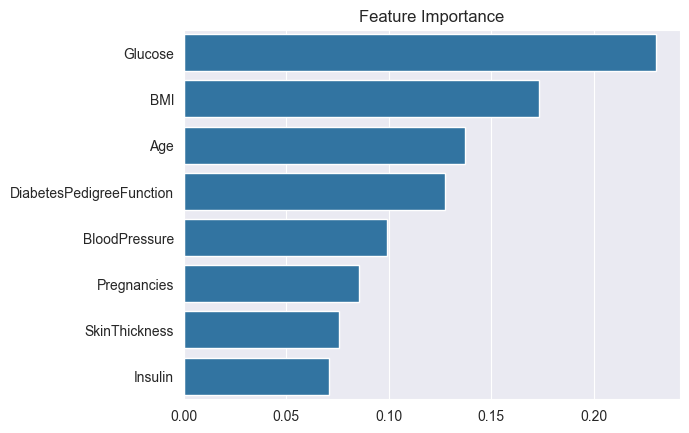

In [139]:
sns.barplot(x=feature_score,y=feature_score.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Feature Importance')

In [140]:
index_list =x_train.columns.get_indexer(feature_score.index)
index_list

array([1, 5, 7, 6, 2, 0, 3, 4], dtype=int64)

In [141]:
n=6
nv_var = index_list[0:n]
nv_var

array([1, 5, 7, 6, 2, 0], dtype=int64)

In [142]:
x_train_nv= x_train.iloc[:, nv_var]
x_test_nv= x_test.iloc[:, nv_var]

In [143]:
rf2 = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=0)
rf2.fit(x_train_nv, y_train)
y_pred_rf2 = rf2.predict(x_test_nv)

In [144]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       146
           1       0.80      0.65      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.81      0.81      0.80       231

